<a href="https://colab.research.google.com/github/BCybercell/COS711_A3/blob/master/StarterNotebook_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
from tqdm import tqdm
import math
import gc

In [2]:
# ! cp content/sample_data/Train_target.csv ./raw_data/Train_target.csv

# ! cp content/sample_data/Test_target.csv ./raw_data/Test_target.csv

###Read CSV

In [5]:
train=pd.read_csv("../content/sample_data/Train.csv")
test=pd.read_csv("../content/sample_data/Test.csv")
sample_sub=pd.read_csv("../content/sample_data/sample_sub.csv")

In [6]:
train.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


In [7]:
test.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press
0,ID_test_0,C,"23.96666667,22.88333333,22.28333333,21.4833333...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.6898333329999999,0.722333333,0.7755833329999...","290.1352379,328.47011289999995,323.5730796,282...","0.6333333329999999,0.725,0.955,0.8725,0.6925,0...","87.64333333,87.67,87.70583333,87.75083333,87.7..."
1,ID_test_1,C,"18.99166667,19.70833333,20.95833333,22.7833333...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.99975,0.99725,0.956333333,0.851583333,0.7775...","295.2350543,307.6569135,313.7360236,311.518385...","0.640833333,1.244166667,1.284166667,1.2875,1.3...","87.8925,87.95666667,87.9925,87.9925,87.9808333..."
2,ID_test_10,D,"25.11666667,25.08333333,24.40833333,23.575,22....","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.760166667,0.733583333,0.78475,0.825833333,0....","77.06161145,95.48124997,61.44498258,89.4688360...","2.0133333330000003,1.3025,0.783333333,0.530833...","90.34,90.2975,90.305,90.35583333,90.4425,90.49..."
3,ID_test_100,C,"18.71666667,20.60833333,22.28333333,23.9833333...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.604,0.0,0.0,...","0.951416667,0.92575,0.8603333329999999,0.77883...","310.7509058,316.186793,324.8167326,327.2174992...","0.745,1.169166667,1.316666667,1.385,1.40083333...","87.98833333,88.06333333,88.07833333,88.0366666..."
4,ID_test_1000,D,"17.63333333,18.05833333,19.625,21.28333333,23....","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.9,0.898333333,0.8725,0.831666667,0.820833332...","334.6054069,329.6848561000001,322.7668036,312....","0.620833333,0.5,0.456666667,0.558333333,1.0158...","90.515,90.5575,90.62333333,90.6825,90.67916667..."


In [8]:
# covert features  fron string to List of values 
def replace_nan(x):
    if x==" ":
        return np.nan
    else :
        return float(x)
features=["temp","precip","rel_humidity","wind_dir","wind_spd","atmos_press"]
for feature in features : 
    train[feature]=train[feature].apply(lambda x: [ replace_nan(X) for X in x.replace("nan"," ").split(",")])
    test[feature]=test[feature].apply(lambda x: [ replace_nan(X)  for X in x.replace("nan"," ").split(",")])    

### Features engineering part

In [9]:
def aggregate_features(x,col_name):
    x["max_"+col_name]=x[col_name].apply(np.max)
    x["min_"+col_name]=x[col_name].apply(np.min)
    x["mean_"+col_name]=x[col_name].apply(np.mean)
    x["std_"+col_name]=x[col_name].apply(np.std)
    x["var_"+col_name]=x[col_name].apply(np.var)
    x["median_"+col_name]=x[col_name].apply(np.median)
    x["ptp_"+col_name]=x[col_name].apply(np.ptp)
    return x  
def remove_nan_values(x):
    return [e for e in x if not math.isnan(e)]


In [10]:
data=pd.concat([train,test],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'location',
 'temp',
 'precip',
 'rel_humidity',
 'wind_dir',
 'wind_spd',
 'atmos_press',
 'target']

In [11]:
data.shape

(20574, 9)

In [12]:
for col_name in tqdm(features):
    data[col_name]=data[col_name].apply(remove_nan_values)

100%|██████████| 6/6 [00:02<00:00,  2.48it/s]


In [13]:
for col_name in tqdm(features):
    data=aggregate_features(data,col_name)

100%|██████████| 6/6 [00:19<00:00,  3.29s/it]


In [14]:
for x in range(121):
    data["newtemp"+ str(x)] = data.temp.str[x]
    data["newprecip"+ str(x)] = data.precip.str[x]
    data["newrel_humidity"+ str(x)] = data.rel_humidity.str[x]
    data["newwind_dir"+ str(x)] = data.wind_dir.str[x]
    data["windspeed"+ str(x)] = data.wind_spd.str[x]
    data["atmospherepressure"+ str(x)] = data.atmos_press.str[x]

In [15]:
data.drop(features,1,inplace=True)

In [16]:
train=data[data.target.notnull()].reset_index(drop=True)
test=data[data.target.isna()].reset_index(drop=True)

In [17]:
del data  
gc.collect()

412

In [18]:
train.head()

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,mean_precip,std_precip,var_precip,median_precip,ptp_precip,max_rel_humidity,min_rel_humidity,mean_rel_humidity,std_rel_humidity,var_rel_humidity,median_rel_humidity,ptp_rel_humidity,max_wind_dir,min_wind_dir,mean_wind_dir,std_wind_dir,var_wind_dir,median_wind_dir,ptp_wind_dir,max_wind_spd,min_wind_spd,mean_wind_spd,std_wind_spd,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,...,newrel_humidity114,newwind_dir114,windspeed114,atmospherepressure114,newtemp115,newprecip115,newrel_humidity115,newwind_dir115,windspeed115,atmospherepressure115,newtemp116,newprecip116,newrel_humidity116,newwind_dir116,windspeed116,atmospherepressure116,newtemp117,newprecip117,newrel_humidity117,newwind_dir117,windspeed117,atmospherepressure117,newtemp118,newprecip118,newrel_humidity118,newwind_dir118,windspeed118,atmospherepressure118,newtemp119,newprecip119,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
0,ID_train_0,C,45.126304,27.208333,19.275000,22.299527,2.594011,6.728895,21.358333,7.933333,0.000,0.0,0.000000,0.000000,0.000000,0.0,0.000,0.891500,0.510818,0.758530,0.120234,0.014456,0.806292,0.380682,345.726333,6.535299,209.574655,120.231802,14455.686315,220.039988,339.191034,1.517500,0.162500,0.677348,0.394041,0.155268,0.666250,1.355000,87.871667,87.614167,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_train_1,D,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,0.0,0.007025,0.051706,0.002673,0.0,0.561,0.979250,0.403083,0.758058,0.160952,0.025906,0.791000,0.576167,357.730286,3.543198,177.109855,96.802929,9370.807133,153.164843,354.187088,3.009167,0.248333,0.899208,0.539199,0.290736,0.744167,2.760833,90.725000,90.056667,...,0.600083,97.603374,1.395833,90.481667,30.233333,0.0,0.556917,69.085542,1.589167,90.354167,30.583333,0.0,0.520833,171.660338,1.695833,90.272500,28.466667,0.0,0.603083,183.291765,2.548333,90.266667,26.991667,0.0,0.651000,213.937567,1.369167,90.325833,26.025000,0.0,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
2,ID_train_10,A,32.661304,31.841667,18.458333,24.112317,3.776377,14.261020,23.304167,13.383333,7.804,0.0,0.151767,0.798401,0.637445,0.0,7.804,0.930333,0.376750,0.712944,0.168129,0.028267,0.766458,0.553583,357.265773,0.581510,201.373211,92.105195,8483.367004,208.901301,356.684263,2.751667,0.331667,1.038656,0.585221,0.342484,0.942500,2.420000,88.813333,87.982500,...,0.881333,NaN,NaN,88.448333,23.541667,0.0,0.734750,NaN,NaN,88.500000,26.408333,0.0,0.603000,NaN,NaN,88.495000,28.075000,0.0,0.496667,NaN,NaN,88.515833,29.241667,0.0,0.459583,NaN,NaN,88.475833,30.091667,0.0,0.437917,NaN,NaN,88.415833,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_train_100,A,53.850238,27.491667,16.941667,20.845273,3.080140,9.487259,19.541667,10.550000,25.787,0.0,1.127273,3.739886,13.986750,0.0,25.787,0.999917,0.618750,0.898326,0.114207,0.013043,0.970167,0.381167,357.246718,3.092044,259.973977,114.240190,13050.821125,318.539747,354.154674,2.744167,0.275000,1.365202,0.580259,0.336701,1.388333,2.469167,88.685000,87.965000,...,0.970167,NaN,NaN,88.382500,17.625000,0.0,0.983833,NaN,NaN,88.406667,18.308333,0.0,0.990833,NaN,NaN,88.449167,20.325000,0.0,0.930417,NaN,NaN,88.507500,21.900000,0.0,0.856500,NaN,NaN,88.500000,23.533333,0.0,0.766417,NaN,NaN,88.490833,24.641667,0.000,0.719667,NaN,NaN,88.465833
4,ID_train_1000,A,177.418750,28.750000,17.525000,21.870732,3.286870,10.803515,20.950000,11.225000,0.136,0.0,0.005100,0.024498,0.000600,0.0,0.136,0.957000,0.486417,0.785134,0.143001,0.020449,0.839792,0.470583,359.193111,10.772327,181.944779,125.337606,15709.515580,160.078536,348.420784,1.994167,0.197500,0.729763,0.426251,0.181690,0.54291

In [19]:
test.head()

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,mean_precip,std_precip,var_precip,median_precip,ptp_precip,max_rel_humidity,min_rel_humidity,mean_rel_humidity,std_rel_humidity,var_rel_humidity,median_rel_humidity,ptp_rel_humidity,max_wind_dir,min_wind_dir,mean_wind_dir,std_wind_dir,var_wind_dir,median_wind_dir,ptp_wind_dir,max_wind_spd,min_wind_spd,mean_wind_spd,std_wind_spd,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,...,newrel_humidity114,newwind_dir114,windspeed114,atmospherepressure114,newtemp115,newprecip115,newrel_humidity115,newwind_dir115,windspeed115,atmospherepressure115,newtemp116,newprecip116,newrel_humidity116,newwind_dir116,windspeed116,atmospherepressure116,newtemp117,newprecip117,newrel_humidity117,newwind_dir117,windspeed117,atmospherepressure117,newtemp118,newprecip118,newrel_humidity118,newwind_dir118,windspeed118,atmospherepressure118,newtemp119,newprecip119,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
0,ID_test_0,C,NaN,26.858333,17.050000,21.389532,2.731833,7.462909,20.908333,9.808333,5.728,0.0,0.204165,0.880254,0.774846,0.0,5.728,0.999833,0.586083,0.842947,0.124179,0.015420,0.859250,0.413750,357.223551,7.092226,231.104760,83.856214,7031.864555,217.738239,350.131326,1.915833,0.171667,0.812555,0.392783,0.154279,0.767500,1.744167,88.020833,87.474167,...,0.739917,177.753339,1.434167,87.855000,23.083333,0.0,0.753750,332.387716,1.082500,87.769167,22.791667,0.0,0.669083,26.775851,0.771667,87.665833,24.766667,0.0,0.666500,173.077647,1.373333,87.583333,24.775000,0.0,0.694083,170.152798,1.320000,87.570833,23.775000,0.000,0.725250,167.412340,1.289167,87.580000,22.766667,0.000,NaN,163.667416,0.774167,87.625833
1,ID_test_1,C,NaN,26.991667,17.275000,21.302824,2.289268,5.240748,20.716667,9.716667,15.831,0.0,0.208719,1.517969,2.304229,0.0,15.831,0.999750,0.583167,0.830610,0.106384,0.011318,0.852000,0.416583,351.333059,6.290985,212.924101,91.254295,8327.346424,181.691165,345.042074,2.099167,0.210000,0.852562,0.456733,0.208605,0.771667,1.889167,88.181667,87.572500,...,0.827083,10.246315,0.490833,87.867500,20.200000,0.0,0.857417,16.434221,0.451667,87.835000,20.041667,0.0,0.870083,86.170659,0.235000,87.805833,20.000000,0.0,0.869000,144.357709,0.391667,87.815833,19.991667,0.0,0.894083,171.419281,0.765000,87.866667,20.075000,0.000,0.868917,174.138794,0.665833,87.920000,20.025000,0.000,0.886083,111.558812,0.311667,87.998333
2,ID_test_10,D,NaN,29.850000,17.108333,22.144421,2.943047,8.661528,21.458333,12.741667,1.327,0.0,0.040190,0.164596,0.027092,0.0,1.327,0.986750,0.515167,0.868258,0.096427,0.009298,0.903750,0.471583,356.508481,2.279896,167.731590,98.024235,9608.750685,144.225803,354.228585,3.127500,0.237500,0.803140,0.569737,0.324600,0.567500,2.890000,90.785000,90.115000,...,0.914417,89.256043,1.035833,90.708333,23.741667,0.0,0.866417,93.654972,1.005833,90.744167,26.141667,0.0,0.767000,134.894732,0.848333,90.614167,27.016667,0.0,0.706833,109.275331,1.820000,90.491667,25.425000,0.0,0.799250,125.909278,2.077500,90.414167,22.758333,0.136,0.892833,99.502531,2.285833,90.409167,20.608333,1.327,0.910167,68.393016,1.395000,90.464167
3,ID_test_100,C,NaN,27.325000,18.633333,22.361639,2.480003,6.150415,21.616667,8.691667,3.604,0.0,0.035686,0.328542,0.107940,0.0,3.604,0.983250,0.582583,0.792134,0.100795,0.010160,0.812000,0.400667,353.300228,0.125888,199.467348,106.904504,11428.572983,172.913664,353.174340,1.790000,0.215000,0.797528,0.430546,0.185370,0.685000,1.575000,88.078333,87.560000,...,0.888417,197.982879,0.215000,87.580000,20.533333,0.0,0.844917,61.039889,0.494167,87.609167,20.683333,0.0,0.812000,138.366782,0.515000,87.633333,20.075000,0.0,0.887833,90.387992,0.415833,87.711667,20.008333,0.0,0.907500,322.944791,0.390833,87.799167,20.425000,0.000,0.897583,329.644351,0.705833,87.844167,21.483333,0.000,0.861333,330.678241,1.026667,8

###Fix missing entries

In [20]:
obj = train.isnull().sum()
# for key,value in obj.iteritems():
    # print(key,",",value)

In [21]:
ids =[]
total = 0
tlen = len(train.index)
half =771/2
for i in range(tlen) :
    temp = train.iloc[i].isnull().sum()
    # print("Nan in row ", i , " : " ,  temp)
    if temp > half:
      total = total +1
      ids.append(train.iloc[i]["ID"])
print("Total rows with more than half of the properties missing ", total)

ids2 =[]
total2 = 0
tlen2 = len(test.index)
half2 =771/2 +1 # plus one for target
for i in range(tlen2) :
    temp = test.iloc[i].isnull().sum()
    # print("Nan in row ", i , " : " ,  temp)
    if temp > half2:
      total2 = total2 +1
      ids2.append(test.iloc[i]["ID"])
print("Total rows with more than half of the properties missing ", total2)



Total rows with more than half of the properties missing  651
Total rows with more than half of the properties missing  111


In [22]:
print(len(train.index))
print(ids)
for id in ids:
  train = train[train.ID != id]
print(len(train.index))

print(len(test.index))
print(ids2)
for id in ids2:
  test = test[test.ID != id]
print(len(test.index))

15539
['ID_train_0', 'ID_train_1000', 'ID_train_10004', 'ID_train_10057', 'ID_train_10086', 'ID_train_10099', 'ID_train_10143', 'ID_train_10151', 'ID_train_10168', 'ID_train_10239', 'ID_train_10243', 'ID_train_10245', 'ID_train_10254', 'ID_train_1029', 'ID_train_10297', 'ID_train_10333', 'ID_train_10365', 'ID_train_10414', 'ID_train_1051', 'ID_train_10560', 'ID_train_106', 'ID_train_10631', 'ID_train_10670', 'ID_train_10684', 'ID_train_10712', 'ID_train_10735', 'ID_train_10736', 'ID_train_10784', 'ID_train_10791', 'ID_train_10831', 'ID_train_10843', 'ID_train_10849', 'ID_train_10857', 'ID_train_10877', 'ID_train_10887', 'ID_train_10896', 'ID_train_10922', 'ID_train_10924', 'ID_train_10938', 'ID_train_10956', 'ID_train_110', 'ID_train_1101', 'ID_train_11047', 'ID_train_11087', 'ID_train_11115', 'ID_train_11123', 'ID_train_11152', 'ID_train_11186', 'ID_train_11203', 'ID_train_11237', 'ID_train_11240', 'ID_train_113', 'ID_train_1131', 'ID_train_11378', 'ID_train_11439', 'ID_train_11468', 

In [23]:
print(len(train.index))

14888


In [24]:
obj = train.isnull().sum()
keys = []
print ("The following have more than a fifth missing data")
fif = len(train.index)/5
for key,value in obj.iteritems():
    if value> fif:
      print(key,",",value)
      if key != "target":
        keys.append(key)
print(keys)

The following have more than a fifth missing data
newwind_dir106 , 3168
windspeed106 , 3168
newwind_dir107 , 3383
windspeed107 , 3383
newwind_dir108 , 3503
windspeed108 , 3503
newwind_dir109 , 3643
windspeed109 , 3643
newwind_dir110 , 3885
windspeed110 , 3885
newwind_dir111 , 4016
windspeed111 , 4016
newwind_dir112 , 4198
windspeed112 , 4198
newwind_dir113 , 4293
windspeed113 , 4293
newwind_dir114 , 4550
windspeed114 , 4550
newwind_dir115 , 5156
windspeed115 , 5156
newwind_dir116 , 5439
windspeed116 , 5439
newwind_dir117 , 5789
windspeed117 , 5789
newwind_dir118 , 6080
windspeed118 , 6080
newwind_dir119 , 6337
windspeed119 , 6337
newrel_humidity120 , 4348
newwind_dir120 , 6592
windspeed120 , 6592
['newwind_dir106', 'windspeed106', 'newwind_dir107', 'windspeed107', 'newwind_dir108', 'windspeed108', 'newwind_dir109', 'windspeed109', 'newwind_dir110', 'windspeed110', 'newwind_dir111', 'windspeed111', 'newwind_dir112', 'windspeed112', 'newwind_dir113', 'windspeed113', 'newwind_dir114', 'wi

In [25]:
test = test.drop(columns=keys)
train  = train.drop(columns=keys)

In [26]:
!pip install -q scikit-learn
from sklearn.impute  import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for col in train.columns.values:
  if col != "ID" and col != "location"  and col != "target":
    train[[col]] = imputer.fit_transform(train[[col]])

In [27]:
test.head()

,ID,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,min_precip,mean_precip,std_precip,var_precip,median_precip,ptp_precip,max_rel_humidity,min_rel_humidity,mean_rel_humidity,std_rel_humidity,var_rel_humidity,median_rel_humidity,ptp_rel_humidity,max_wind_dir,min_wind_dir,mean_wind_dir,std_wind_dir,var_wind_dir,median_wind_dir,ptp_wind_dir,max_wind_spd,min_wind_spd,mean_wind_spd,std_wind_spd,var_wind_spd,median_wind_spd,ptp_wind_spd,max_atmos_press,min_atmos_press,...,atmospherepressure110,newtemp111,newprecip111,newrel_humidity111,atmospherepressure111,newtemp112,newprecip112,newrel_humidity112,atmospherepressure112,newtemp113,newprecip113,newrel_humidity113,atmospherepressure113,newtemp114,newprecip114,newrel_humidity114,atmospherepressure114,newtemp115,newprecip115,newrel_humidity115,atmospherepressure115,newtemp116,newprecip116,newrel_humidity116,atmospherepressure116,newtemp117,newprecip117,newrel_humidity117,atmospherepressure117,newtemp118,newprecip118,newrel_humidity118,atmospherepressure118,newtemp119,newprecip119,newrel_humidity119,atmospherepressure119,newtemp120,newprecip120,atmospherepressure120
0,ID_test_0,C,NaN,26.858333,17.050000,21.389532,2.731833,7.462909,20.908333,9.808333,5.728,0.0,0.204165,0.880254,0.774846,0.0,5.728,0.999833,0.586083,0.842947,0.124179,0.015420,0.859250,0.413750,357.223551,7.092226,231.104760,83.856214,7031.864555,217.738239,350.131326,1.915833,0.171667,0.812555,0.392783,0.154279,0.767500,1.744167,88.020833,87.474167,...,87.939167,21.425000,0.0,0.754500,88.011667,23.641667,0.0,0.650750,88.017500,24.850000,0.0,0.645083,87.950000,25.100000,0.0,0.739917,87.855000,23.083333,0.0,0.753750,87.769167,22.791667,0.0,0.669083,87.665833,24.766667,0.0,0.666500,87.583333,24.775000,0.0,0.694083,87.570833,23.775000,0.000,0.725250,87.580000,22.766667,0.000,87.625833
1,ID_test_1,C,NaN,26.991667,17.275000,21.302824,2.289268,5.240748,20.716667,9.716667,15.831,0.0,0.208719,1.517969,2.304229,0.0,15.831,0.999750,0.583167,0.830610,0.106384,0.011318,0.852000,0.416583,351.333059,6.290985,212.924101,91.254295,8327.346424,181.691165,345.042074,2.099167,0.210000,0.852562,0.456733,0.208605,0.771667,1.889167,88.181667,87.572500,...,87.961667,20.800000,0.0,0.794917,87.982500,21.058333,0.0,0.787917,87.944167,21.066667,0.0,0.767417,87.907500,20.633333,0.0,0.827083,87.867500,20.200000,0.0,0.857417,87.835000,20.041667,0.0,0.870083,87.805833,20.000000,0.0,0.869000,87.815833,19.991667,0.0,0.894083,87.866667,20.075000,0.000,0.868917,87.920000,20.025000,0.000,87.998333
2,ID_test_10,D,NaN,29.850000,17.108333,22.144421,2.943047,8.661528,21.458333,12.741667,1.327,0.0,0.040190,0.164596,0.027092,0.0,1.327,0.986750,0.515167,0.868258,0.096427,0.009298,0.903750,0.471583,356.508481,2.279896,167.731590,98.024235,9608.750685,144.225803,354.228585,3.127500,0.237500,0.803140,0.569737,0.324600,0.567500,2.890000,90.785000,90.115000,...,90.456667,19.358333,0.0,0.933083,90.519167,19.491667,0.0,0.941417,90.588333,21.000000,0.0,0.951167,90.660833,23.350000,0.0,0.914417,90.708333,23.741667,0.0,0.866417,90.744167,26.141667,0.0,0.767000,90.614167,27.016667,0.0,0.706833,90.491667,25.425000,0.0,0.799250,90.414167,22.758333,0.136,0.892833,90.409167,20.608333,1.327,90.464167
3,ID_test_100,C,NaN,27.325000,18.633333,22.361639,2.480003,6.150415,21.616667,8.691667,3.604,0.0,0.035686,0.328542,0.107940,0.0,3.604,0.983250,0.582583,0.792134,0.100795,0.010160,0.812000,0.400667,353.300228,0.125888,199.467348,106.904504,11428.572983,172.913664,353.174340,1.790000,0.215000,0.797528,0.430546,0.185370,0.685000,1.575000,88.078333,87.560000,...,87.738333,20.933333,0.0,0.811667,87.711667,20.458333,0.0,0.856917,87.649167,20.058333,0.0,0.880167,87.595833,20.008333,0.0,0.888417,87.580000,20.533333,0.0,0.844917,87.609167,20.683333,0.0,0.812000,87.633333,20.075000,0.0,0.887833,87.711667,20.008333,0.0,0.907500,87.799167,20.425000,0.000,0.897583,87.844167,21.483333,0.000,87.894167
4,ID_test_1000,D,NaN,31.091667,16.908333,23.560243,4.1

### Separate Train and Test

In [28]:
trainUse = train
testuse = test

l = trainUse.columns.tolist()
cols = []
for col in l:
  if col != 'ID' and  col != 'location':
    cols.append(col)
newtrainUse = trainUse[cols]

size = len(newtrainUse.index)
tr = int(size *0.8)
tes = size - tr
indices = np.random.permutation(newtrainUse.shape[0])
training_idx, test_idx = indices[:tr], indices[tr:]
from sklearn.preprocessing import normalize

from sklearn import preprocessing# Get column names first

names = newtrainUse.columns# Create the Scaler object



scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(newtrainUse)
scaled_df = pd.DataFrame(scaled_df, columns=names)

traininguse, testuse = scaled_df.iloc[training_idx,:], scaled_df.iloc[test_idx,:]

l = traininguse.columns.tolist()
cols = []
for col in l:
  if col != 'target' and col != 'ID' and  col != 'location':
    cols.append(col)
newtrainUse = traininguse[cols]

trainingy = traininguse['target']

trainingx = traininguse[cols]
testy =testuse['target']
testx = testuse[cols]

print(trainingx)
print(trainingy)
print(testx)
print(testy)


       max_temp  min_temp  ...  newprecip120  atmospherepressure120
5395  -1.497524  0.014672  ...     -0.106358              -0.496688
7017   0.143970 -1.079267  ...     -0.106358               1.509163
10622  2.119395  1.393651  ...     -0.106358              -0.723171
14816  0.272714 -0.339702  ...     -0.106358               1.039118
8725  -0.322730 -0.486074  ...     -0.106358              -0.496688
...         ...       ...  ...           ...                    ...
3904   0.542273 -0.424444  ...     -0.106358               1.550235
10716 -0.431358  0.538530  ...     -0.106358              -0.718608
13473  0.759530  1.393651  ...     -0.106358              -0.564208
13338 -1.143477 -0.378221  ...     -0.106358              -1.384885
13834 -0.813569 -0.031551  ...     -0.106358              -0.528460

[11910 rows x 737 columns]
5395    -0.381112
7017    -0.776278
10622    0.251869
14816   -0.287572
8725    -0.936714
           ...   
3904     0.539987
10716   -0.688167
13473   -0.4

###LSTM

In [30]:

import warnings
import numpy as np
from numpy import newaxis
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
import time
from sklearn_pandas import DataFrameMapper


def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_shape=(layers[1], layers[0]),
        units=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        units=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="adam")
    print("> Compilation Time : ", time.time() - start)
    return model


model = build_model([1, 737, 15, 1])

Using TensorFlow backend.


> Compilation Time :  0.010640621185302734


       max_temp  min_temp  ...  newprecip120  atmospherepressure120
9603   0.224435 -1.021138  ...     -0.106358              -0.496688
7178   0.558366 -2.373504  ...     -0.106358               1.298479
7787   0.031318  0.900608  ...     -0.106358               1.630097
14263  0.405482 -1.040748  ...     -0.106358               1.460485
482    1.077368 -0.894376  ...     -0.106358               1.119740
...         ...       ...  ...           ...                    ...
6726   0.687111  0.885201  ...     -0.106358               1.572292
2154  -0.141683  0.322824  ...      0.098146              -0.610604
9689  -0.564126 -0.054662  ...     -0.106358               1.531220
4178  -0.189962 -1.549198  ...     -0.106358               1.617927
2450   0.156039 -0.878968  ...     -0.106358               1.197320

[11910 rows x 737 columns]
Train on 11314 samples, validate on 596 samples
Epoch 1/10
11314/11314 [==============================] - 2851s 252ms/step - loss: 1.0809 - val_loss: 0.9493

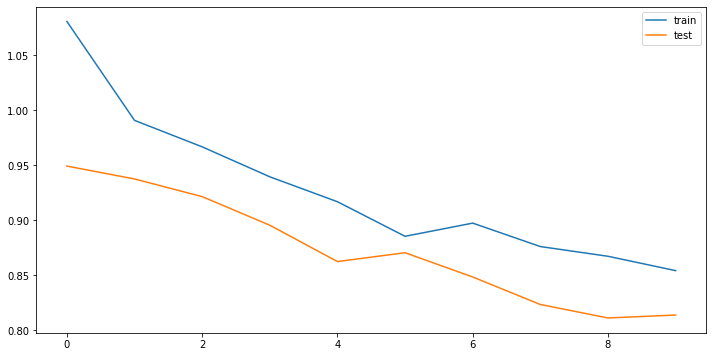

In [31]:
trainingx.ndim

print(trainingx)
trainingx1 = np.reshape(trainingx.values,(trainingx.shape[0],trainingx.shape[1],1))
# trainingx2= np.reshape(trainingx, (trainingx.shape[0],trainingx.shape[1],-1))

testx1 = np.reshape(testx.values, (testx.shape[0], testx.shape[1],1))
start = time.time()
hist = model.fit(
    trainingx1,
    trainingy,
    batch_size=256,
    epochs=10,
    validation_split=0.05)
print("> Compilation Time : ", time.time() - start)


# plotting the loss values for the epochs
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

Streaming output truncated to the last 5000 lines.
Prediction  957  is  [0.05567469]
Prediction  958  is  [-0.3860777]
Prediction  959  is  [1.1180887]
Prediction  960  is  [-0.13253559]
Prediction  961  is  [-0.2800043]
Prediction  962  is  [0.18940914]
Prediction  963  is  [0.4849369]
Prediction  964  is  [-0.15714821]
Prediction  965  is  [-0.00384258]
Prediction  966  is  [0.12703833]
Prediction  967  is  [-0.22014004]
Prediction  968  is  [0.0941461]
Prediction  969  is  [-0.20649087]
Prediction  970  is  [0.16751452]
Prediction  971  is  [-0.02018168]
Prediction  972  is  [-0.34195685]
Prediction  973  is  [0.7458555]
Prediction  974  is  [0.16259417]
Prediction  975  is  [-0.16723981]
Prediction  976  is  [-0.42735663]
Prediction  977  is  [-0.06631734]
Prediction  978  is  [-0.27487713]
Prediction  979  is  [-0.20649086]
Prediction  980  is  [0.09962]
Prediction  981  is  [0.26192293]
Prediction  982  is  [0.08074992]
Prediction  983  is  [0.7514178]
Prediction  984  is  [-0.20

###CNN Attempt 2

In [164]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [165]:
trainingx1 = np.reshape(trainingx.values,(trainingx.shape[0],trainingx.shape[1],1))
# trainingx2= np.reshape(trainingx, (trainingx.shape[0],trainingx.shape[1],-1))

testx1 = np.reshape(testx.values, (testx.shape[0], testx.shape[1],1))

In [166]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(trainingx1.shape[1], 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [167]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 736, 32)           96        
_________________________________________________________________
flatten_5 (Flatten)          (None, 23552)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                1507392   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 1,507,553
Trainable params: 1,507,553
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start = time.time()
hist2 = model.fit(trainingx1, trainingy, batch_size=256,epochs=200, verbose=1)
print("> Compilation Time : ", time.time() - start)


# plotting the loss values for the epochs
plt.figure(figsize=(12,6))
plt.plot(hist2.history['loss'], label='train')
plt.legend()
plt.show()

Epoch 1/200
11910/11910 [==============================] - 10s 858us/step - loss: 1.9025
Epoch 2/200
11910/11910 [==============================] - 9s 785us/step - loss: 1.0019
Epoch 3/200
11910/11910 [==============================] - 10s 844us/step - loss: 0.9534
Epoch 4/200
11910/11910 [==============================] - 10s 847us/step - loss: 0.9230
Epoch 5/200
11910/11910 [==============================] - 10s 858us/step - loss: 0.9071
Epoch 6/200
11910/11910 [==============================] - 10s 811us/step - loss: 0.8934
Epoch 7/200
11910/11910 [==============================] - 10s 857us/step - loss: 0.8797
Epoch 8/200
11910/11910 [==============================] - 10s 850us/step - loss: 0.8679
Epoch 9/200
11910/11910 [==============================] - 10s 833us/step - loss: 0.8551
Epoch 10/200
11910/11910 [==============================] - 10s 821us/step - loss: 0.8448
Epoch 11/200
11910/11910 [==============================] - 10s 876us/step - loss: 0.8331
Epoch 12/200
11910/1

In [ ]:
ypred = model.predict(testx1)

In [ ]:
print(ypred)

In [ ]:
print(model.evaluate(trainingx1, trainingy))

print("MSE: %.4f" % mean_squared_error(testy, ypred))


In [ ]:
x_ax = range(len(ypred))
plt.scatter(x_ax, testy, s=1, color="blue", label="original")
plt.scatter(x_ax, ypred, s=1, color="red", label="predicted")
plt.legend()
plt.show()